# La transfomacion box-cox

Cuando hicimos los histogramas de las variables numericas notamos que esto presentaban sesgos para corregir un poco esto y porque es una buena practica para la contruccion de modelos lineales vamos a aplicar la trasformacion box-cox a las columnas numericas del dataset

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

df_laptops = pd.read_csv("dataset/p_laptops.csv")

Veamos los histogramas y los graficos de caja y bigote de las variables numericas antes y depues de la transfomacion box-cox

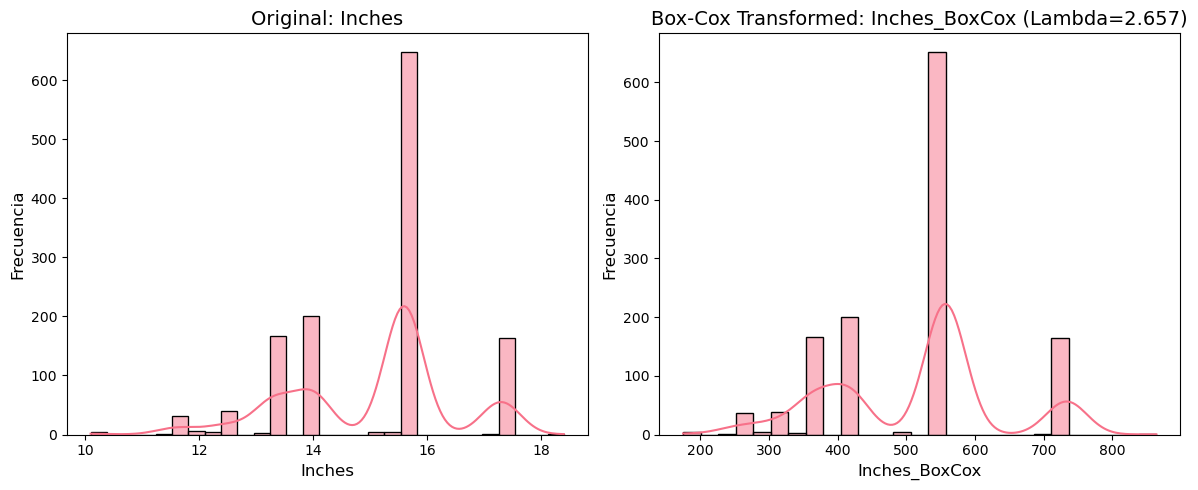

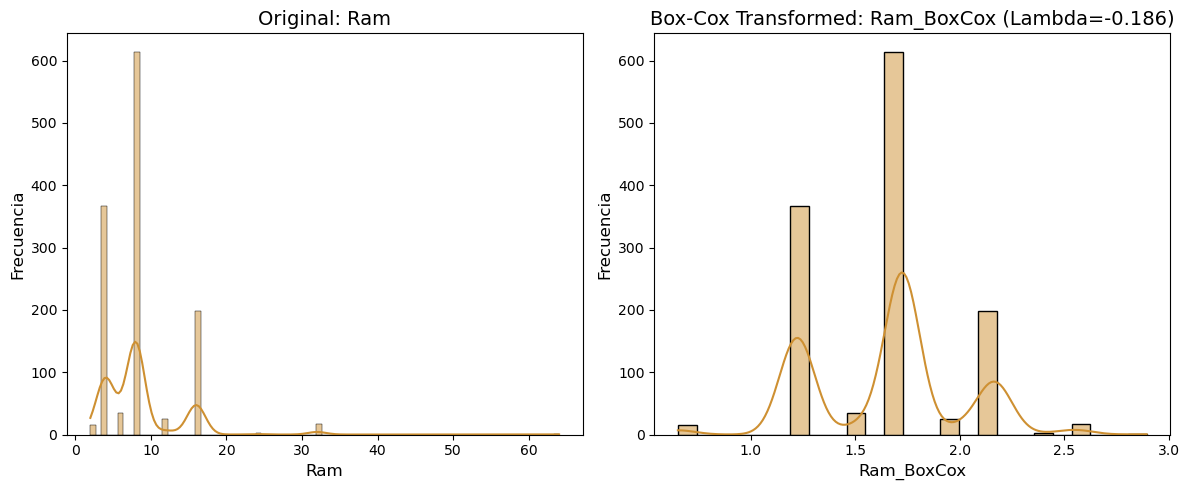

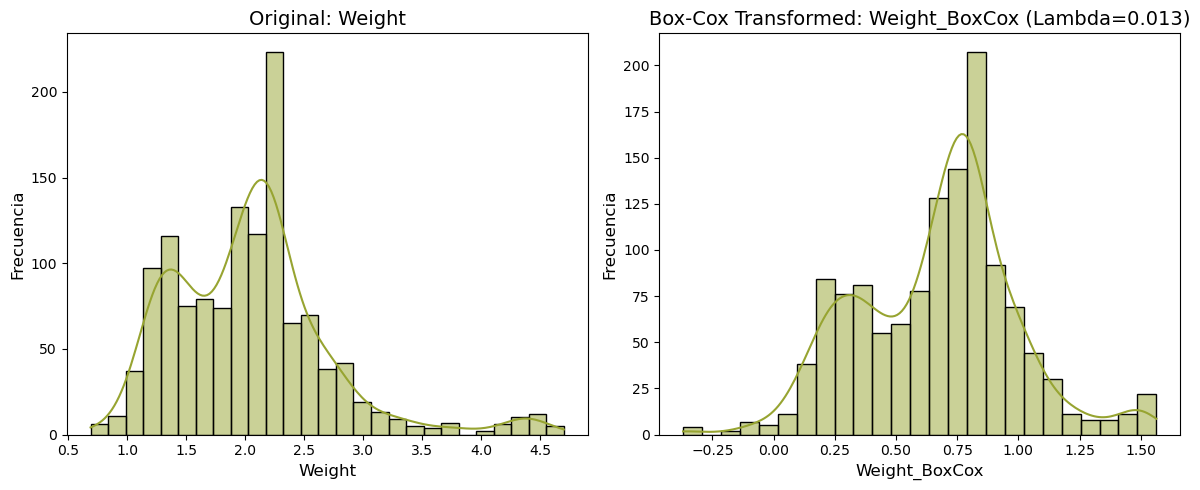

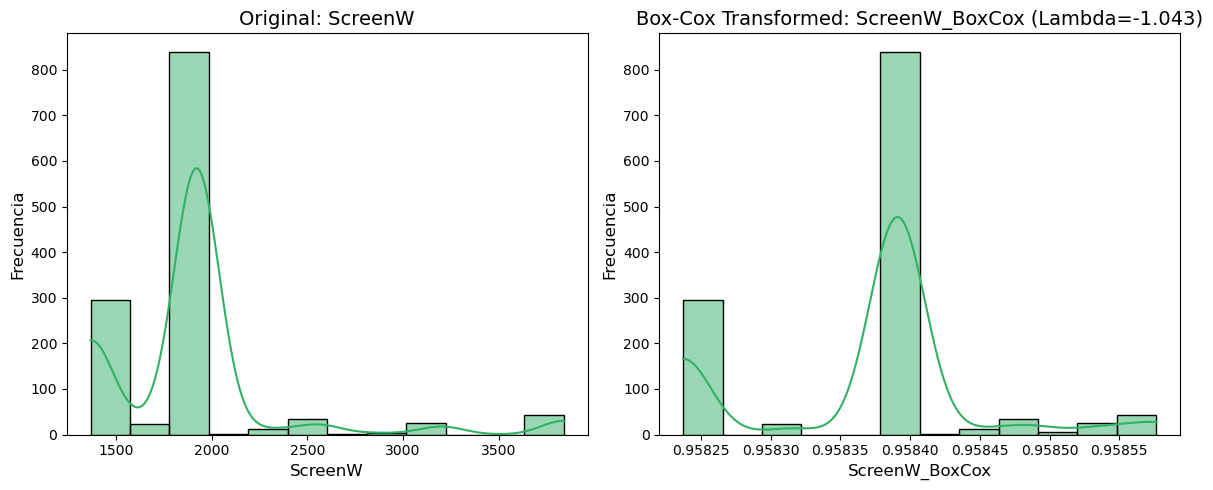

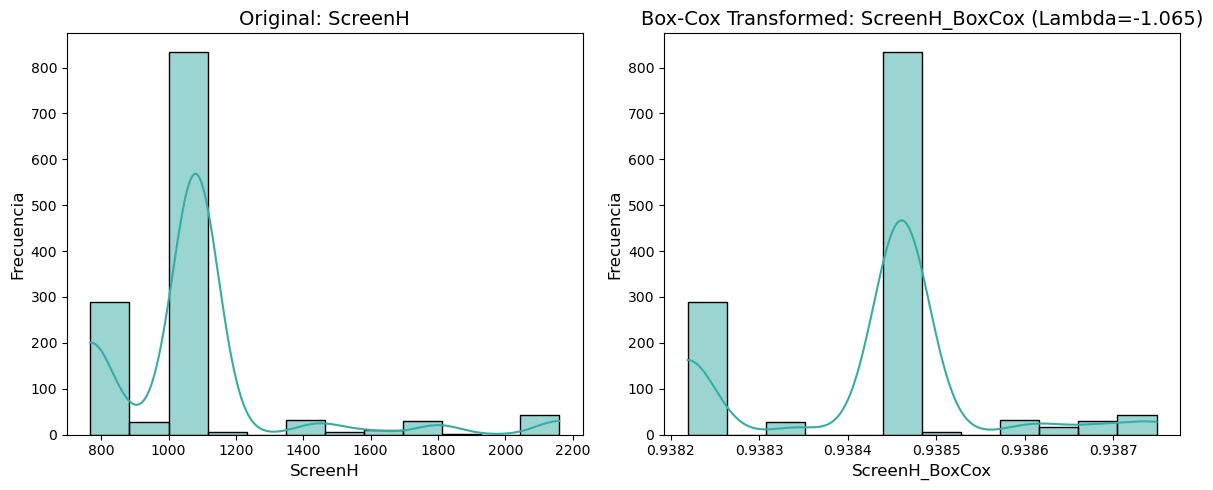

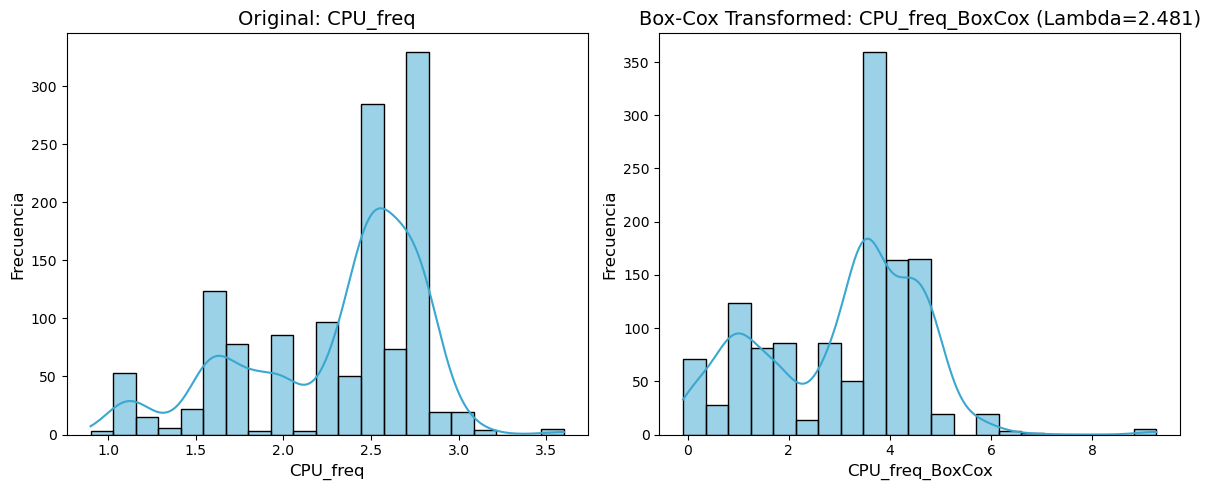

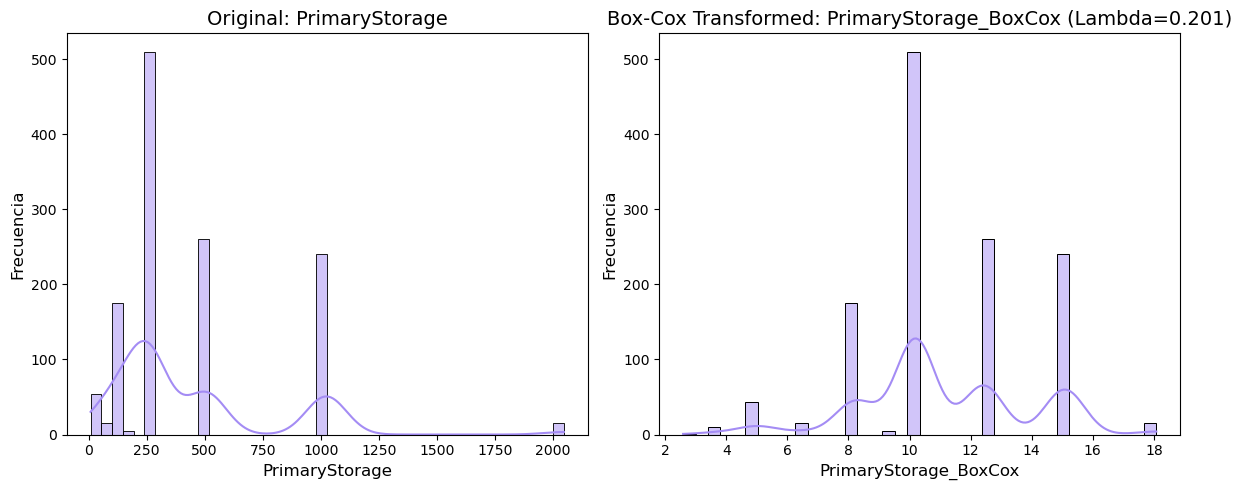

Advertencia: 'SecondaryStorage' contiene valores no positivos o cero. Sumando 1 para Box-Cox.


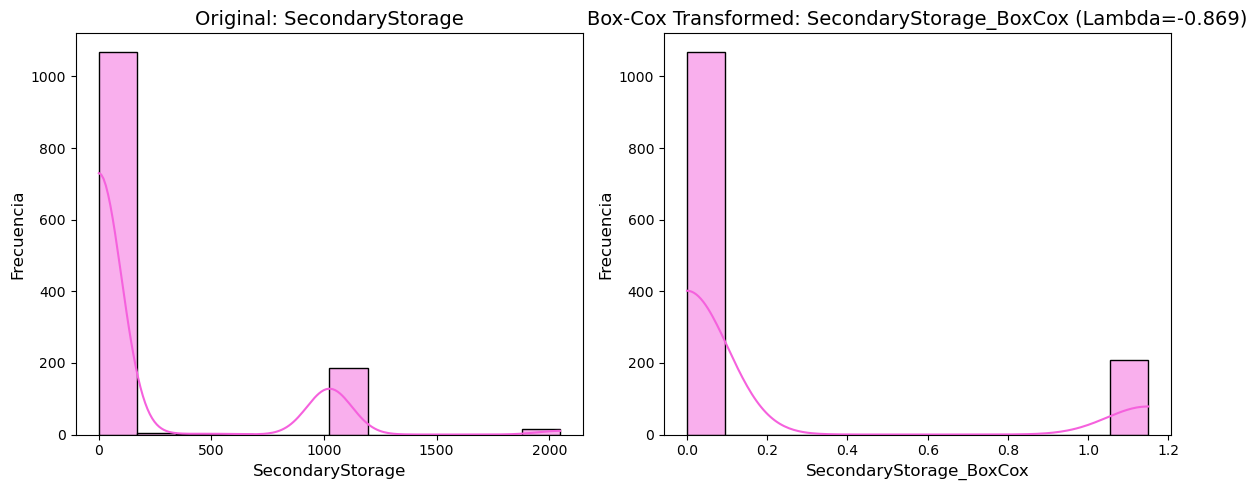

In [2]:
# Lista de características numéricas originales (antes de ScreenPixels)
numeric_features_original = [
    'Inches',
    'Ram',
    'Weight',
    'ScreenW',
    'ScreenH',
    'CPU_freq',
    'PrimaryStorage',
    'SecondaryStorage'
]

# Paleta de colores para los gráficos
colors = sns.color_palette("husl", len(numeric_features_original))
boxcox_lambdas = {}

for i, feature in enumerate(numeric_features_original):
    # Verificamos si la columna existe en el DataFrame
    if feature not in df_laptops.columns:
        print(f"Advertencia: La columna '{feature}' no se encontró en el DataFrame. Saltando transformación y visualización.")
        continue

    # Filtramos valores NaN y asegurarse de que los datos sean numéricos
    data_to_transform = df_laptops[feature].dropna()

    # Box-Cox requiere que todos los valores sean positivos.
    # Si hay ceros o negativos, se puede añadir una pequeña constante.
    if (data_to_transform <= 0).any():
        print(f"Advertencia: '{feature}' contiene valores no positivos o cero. Sumando 1 para Box-Cox.")
        data_to_transform_adjusted = data_to_transform + 1
    else:
        data_to_transform_adjusted = data_to_transform

    # Evitamos transformar si todos los valores son iguales (varianza 0)
    if data_to_transform_adjusted.nunique() == 1:
        print(f"Advertencia: '{feature}' tiene un solo valor único. Saltando transformación Box-Cox y visualización.")
        df_laptops[f'{feature}_BoxCox'] = df_laptops[feature] # Mantener la columna como está
        continue

    # Aplicamos Box-Cox
    transformed_data, lambda_val = boxcox(data_to_transform_adjusted)

    # Aplicamos la transformación de vuelta al DataFrame original, manejando los posibles ceros/negativos
    if (data_to_transform <= 0).any():
        df_laptops[f'{feature}_BoxCox'] = df_laptops[feature].apply(
            lambda x: boxcox([x + 1], lmbda=lambda_val)[0] if pd.notna(x) and x <= 0 else (boxcox([x], lmbda=lambda_val)[0] if pd.notna(x) else np.nan)
        )
    else:
        df_laptops[f'{feature}_BoxCox'] = df_laptops[feature].apply(
            lambda x: boxcox([x], lmbda=lambda_val)[0] if pd.notna(x) else np.nan
        )

    boxcox_lambdas[feature] = lambda_val

    # Visualizamos antes y después
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data_to_transform, kde=True, color=colors[i])
    plt.title(f'Original: {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    plt.subplot(1, 2, 2)
    sns.histplot(df_laptops[f'{feature}_BoxCox'].dropna(), kde=True, color=colors[i])
    plt.title(f'Box-Cox Transformed: {feature}_BoxCox (Lambda={lambda_val:.3f})', fontsize=14)
    plt.xlabel(f'{feature}_BoxCox', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    plt.tight_layout()
    plt.show()

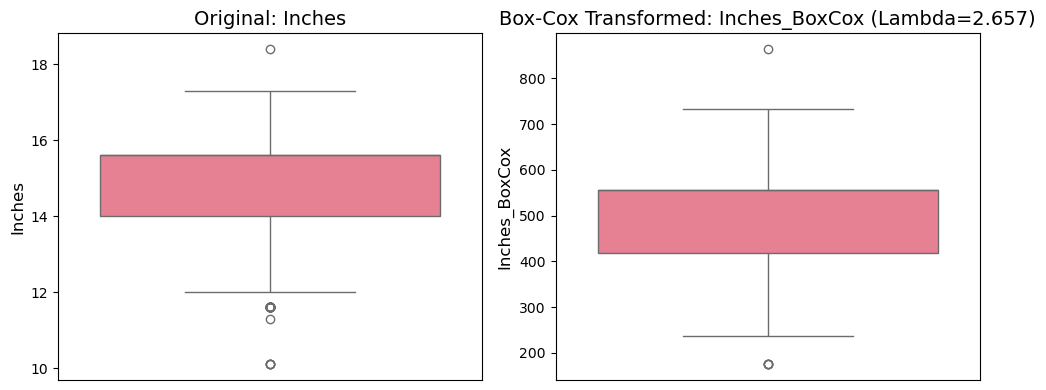

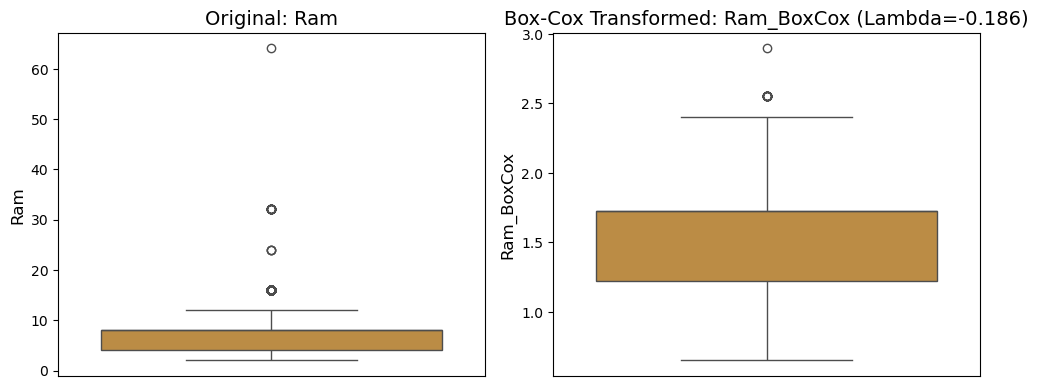

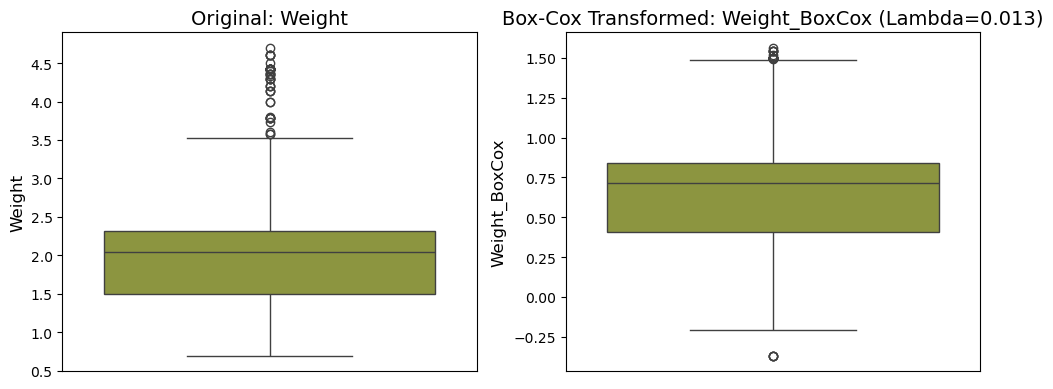

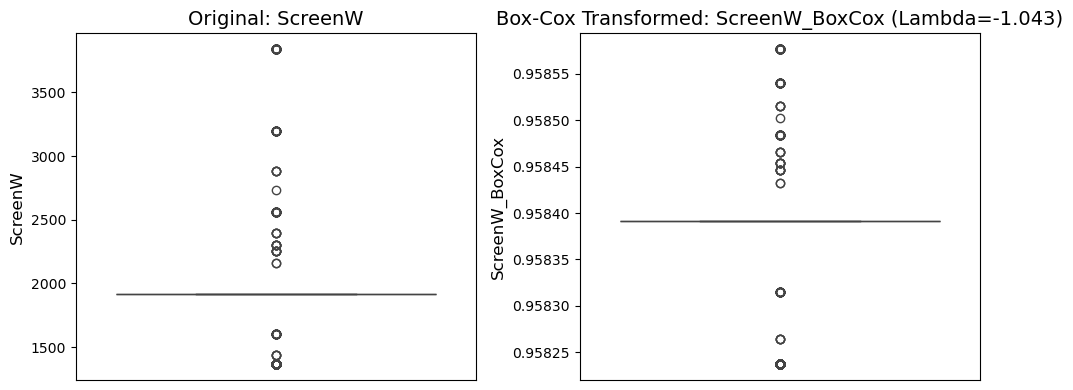

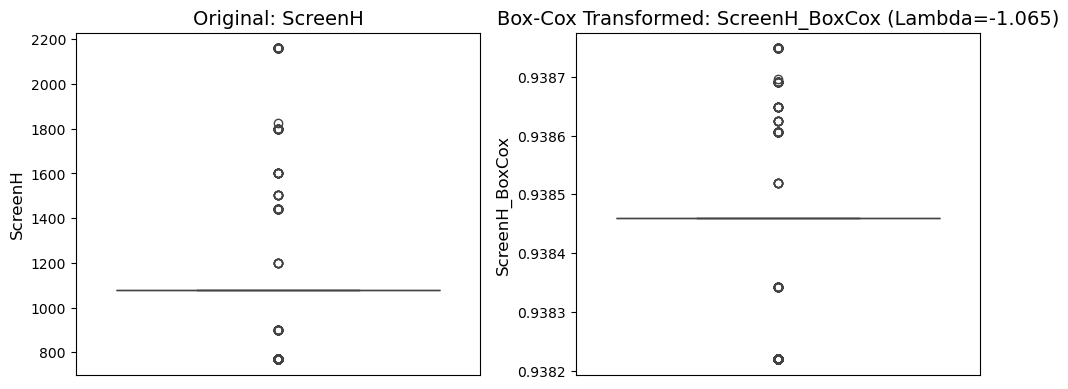

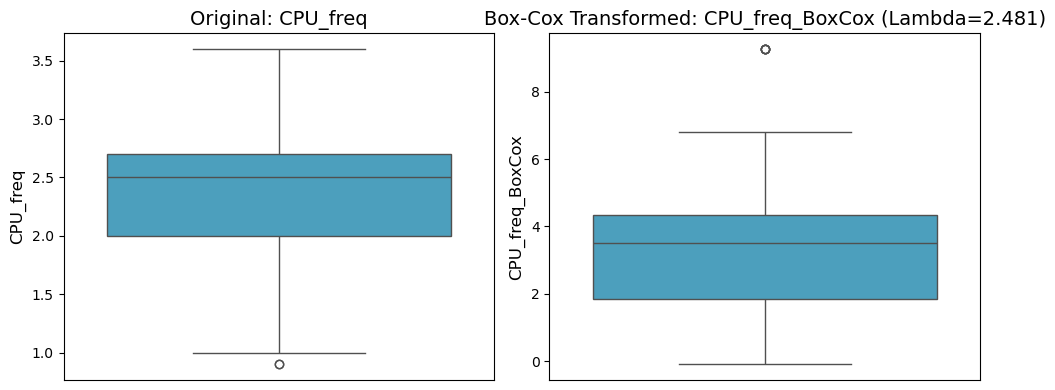

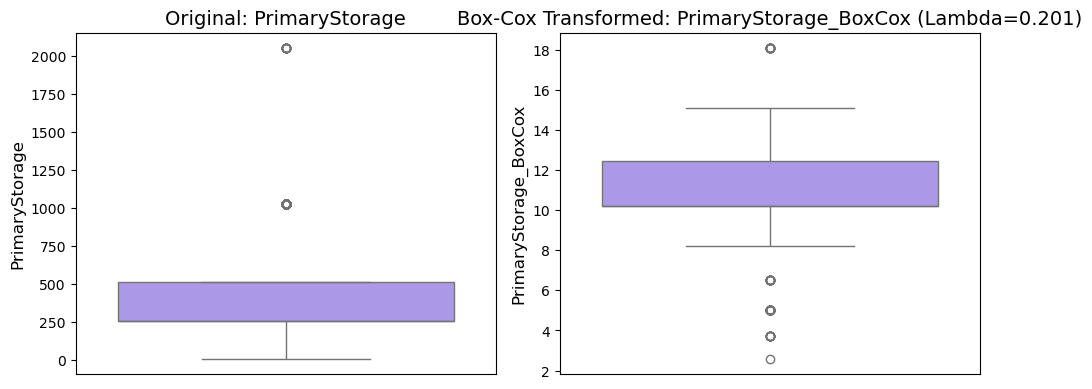

Advertencia: 'SecondaryStorage' contiene valores no positivos o cero. Sumando 1 para Box-Cox.


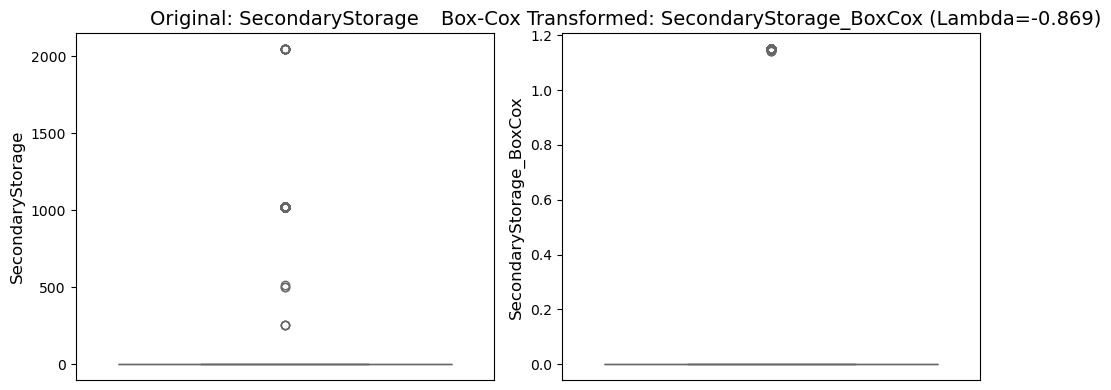

In [3]:
# Paleta de colores para los gráficos
colors = sns.color_palette("husl", len(numeric_features_original))
boxcox_lambdas = {}

for i, feature in enumerate(numeric_features_original):
    # Verificamos si la columna existe en el DataFrame
    if feature not in df_laptops.columns:
        print(f"Advertencia: La columna '{feature}' no se encontró en el DataFrame. Saltando transformación y visualización.")
        continue

    # Filtramos valores NaN y asegurarnos de que los datos sean numéricos
    data_to_transform = df_laptops[feature].dropna()

    # Box-Cox requiere que todos los valores sean positivos.
    # Si hay ceros o negativos, se puede añadir una pequeña constante.
    if (data_to_transform <= 0).any():
        print(f"Advertencia: '{feature}' contiene valores no positivos o cero. Sumando 1 para Box-Cox.")
        data_to_transform_adjusted = data_to_transform + 1
    else:
        data_to_transform_adjusted = data_to_transform

    # Evitamos transformar si todos los valores son iguales (varianza 0)
    if data_to_transform_adjusted.nunique() == 1:
        print(f"Advertencia: '{feature}' tiene un solo valor único. Saltando transformación Box-Cox y visualización.")
        df_laptops[f'{feature}_BoxCox'] = df_laptops[feature] # Mantener la columna como está
        continue

    # Aplicamos Box-Cox
    transformed_data, lambda_val = boxcox(data_to_transform_adjusted)

    # Aplicamos la transformación de vuelta al DataFrame original, manejando los posibles ceros/negativos
    if (data_to_transform <= 0).any():
        df_laptops[f'{feature}_BoxCox'] = df_laptops[feature].apply(
            lambda x: boxcox([x + 1], lmbda=lambda_val)[0] if pd.notna(x) and x <= 0 else (boxcox([x], lmbda=lambda_val)[0] if pd.notna(x) else np.nan)
        )
    else:
        df_laptops[f'{feature}_BoxCox'] = df_laptops[feature].apply(
            lambda x: boxcox([x], lmbda=lambda_val)[0] if pd.notna(x) else np.nan
        )

    boxcox_lambdas[feature] = lambda_val

    # Visualizamos antes y después con Box Plots
    plt.figure(figsize=(10, 4)) # Ajustar el tamaño para box plots

    # Box Plot Original
    plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
    sns.boxplot(y=data_to_transform, color=colors[i])
    plt.title(f'Original: {feature}', fontsize=14)
    plt.ylabel(feature, fontsize=12)
    plt.xticks([]) # No necesitamos etiquetas en el eje x para un solo box plot

    # Box Plot Transformado
    plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
    sns.boxplot(y=df_laptops[f'{feature}_BoxCox'].dropna(), color=colors[i])
    plt.title(f'Box-Cox Transformed: {feature}_BoxCox (Lambda={lambda_val:.3f})', fontsize=14)
    plt.ylabel(f'{feature}_BoxCox', fontsize=12)
    plt.xticks([]) # No necesitamos etiquetas en el eje x para un solo box plot

    plt.tight_layout() # Ajustar el diseño para evitar superposiciones
    plt.show()

Lo que acabamos de ver anteriormente era los graficos de distribucion y de caja y bigotes de las variables numericas continuas del dataset para observar las diferencias antes y despues de la transformacion 

Ahora veamos como le fue a la correlacion entre variables

Advertencia: 'SecondaryStorage' contiene valores no positivos o cero. Sumando 1 para Box-Cox.


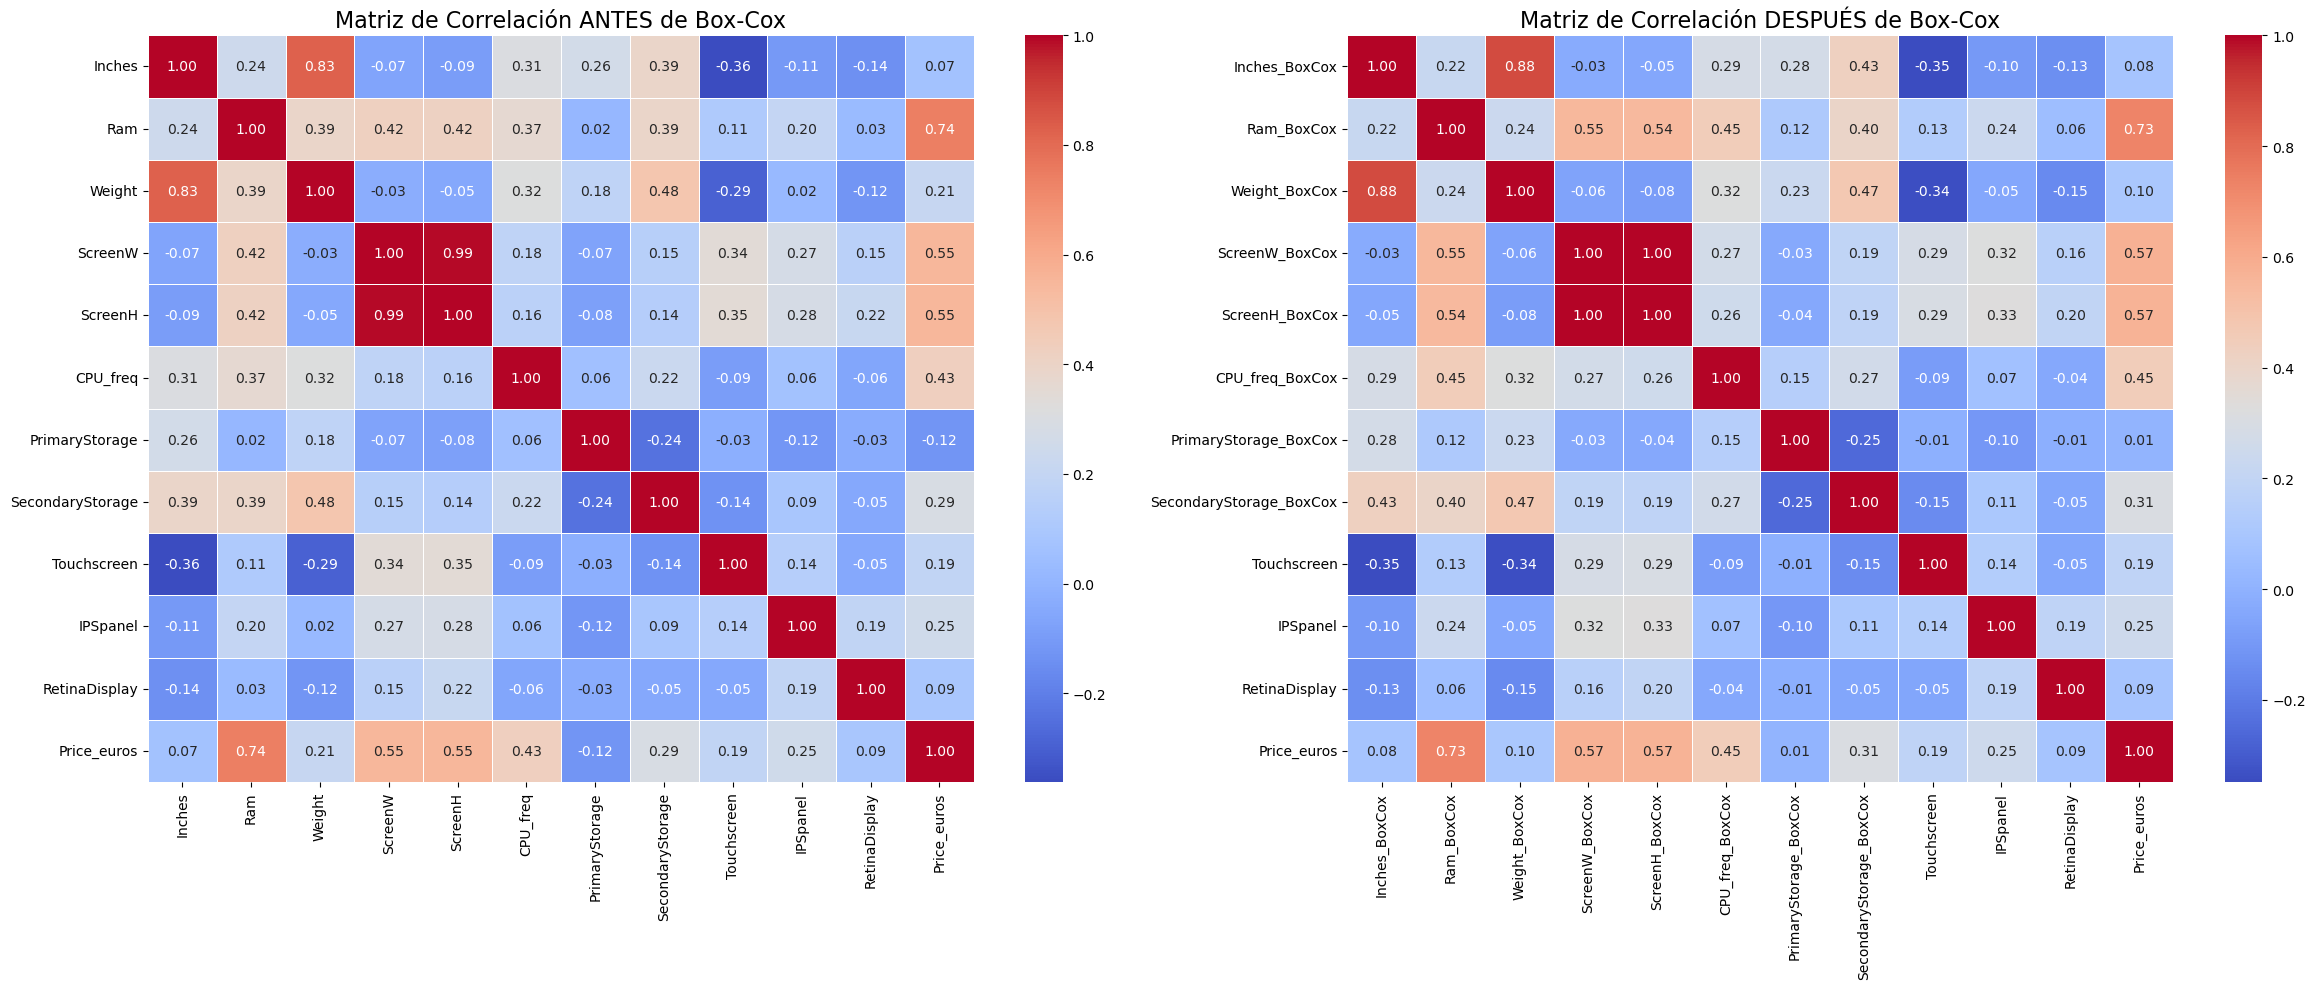

In [4]:
# --- Cargamos nuevamente el dataset original para la matriz "antes" ---
df_laptops_original = pd.read_csv("dataset/p_laptops.csv", encoding='latin-1')

# --- Preparamos el DataFrame para las transformaciones para la matriz "después" ---
# Es crucial crear una COPIA para trabajar con las transformaciones
df_laptops_transformed = df_laptops_original.copy()

# Lista de características numéricas originales
numeric_features_original = [
    'Inches',
    'Ram',
    'Weight',
    'ScreenW',
    'ScreenH',
    'CPU_freq',
    'PrimaryStorage',
    'SecondaryStorage'
]

# Características binarias (asumiendo que ya están en 0/1 o las convertimos)
binary_features = [
    'Touchscreen',
    'IPSpanel',
    'RetinaDisplay'
]

# Aseguramos que las binarias son 0/1 en ambos DataFrames
# Esto debe hacerse ANTES de construir las listas de columnas para las correlaciones
for df in [df_laptops_original, df_laptops_transformed]:
    for col_bin in binary_features:
        if col_bin in df.columns and df[col_bin].dtype == 'object':
            df[col_bin] = df[col_bin].apply(lambda x: 1 if x == 'Yes' else 0)
            print(f"Columna '{col_bin}' convertida a binario (0/1) en un DataFrame.") # Mensaje para depuración

# Aplicamos Box-Cox para crear el DataFrame transformado
boxcox_lambdas = {}
for feature in numeric_features_original:
    if feature not in df_laptops_transformed.columns:
        print(f"Advertencia: La columna '{feature}' no se encontró para transformación. Saltando.")
        continue

    data_to_transform = df_laptops_transformed[feature].dropna()

    if (data_to_transform <= 0).any():
        # Añadimos 1 solo si es necesario, y transformar la columna completa
        print(f"Advertencia: '{feature}' contiene valores no positivos o cero. Sumando 1 para Box-Cox.")
        # Aquí, aplicamos la transformación directamente a la columna en df_laptops_transformed
        transformed_col_data, lambda_val = boxcox(df_laptops_transformed[feature].replace(0, 1).dropna()) # Reemplazar 0s por 1s para Box-Cox
        df_laptops_transformed[f'{feature}_BoxCox'] = df_laptops_transformed[feature].replace(0, 1).apply(lambda x: boxcox([x], lmbda=lambda_val)[0])
    else:
        # Aplicamos Box-Cox directamente si todos los valores son positivos
        transformed_col_data, lambda_val = boxcox(df_laptops_transformed[feature].dropna())
        df_laptops_transformed[f'{feature}_BoxCox'] = df_laptops_transformed[feature].apply(lambda x: boxcox([x], lmbda=lambda_val)[0] if pd.notna(x) else np.nan)


    # Manejo de varianza cero para Box-Cox (si no se aplicó arriba)
    if data_to_transform.nunique() == 1:
        print(f"Advertencia: '{feature}' tiene un solo valor único. Saltando transformación Box-Cox.")
        # Si no hay variación, la columna BoxCox es simplemente la original
        df_laptops_transformed[f'{feature}_BoxCox'] = df_laptops_transformed[feature]
    else:
        # Si la transformación se realizó, guardamos el lambda
        boxcox_lambdas[feature] = lambda_val


# --- Finalizamos la preparación de columnas para las matrices ---

# La matriz original usa las características numéricas originales + binarias + Price_euros
all_numeric_binary_original_features = numeric_features_original + binary_features + ['Price_euros']

# La matriz transformada usa las *nuevas* columnas _BoxCox + binarias + Price_euros
transformed_numeric_cols_for_corr = [f'{col}_BoxCox' for col in numeric_features_original if f'{col}_BoxCox' in df_laptops_transformed.columns]

# Aquí agregamos 'Price_euros' a la lista de columnas transformadas, ya que no se aplica Box-Cox a Price_euros en este paso
# y debe estar en el df_laptops_transformed para la correlación.
all_numeric_binary_transformed_features = transformed_numeric_cols_for_corr + binary_features + ['Price_euros']


# --- Calculamos las matrices de correlación ---
# Aseguramos de que todas las columnas existan en los DataFrames respectivos
correlation_matrix_original = df_laptops_original[all_numeric_binary_original_features].corr()
correlation_matrix_transformed = df_laptops_transformed[all_numeric_binary_transformed_features].corr()

# --- Visualizamos las matrices de correlación lado a lado ---
plt.figure(figsize=(24, 10))

# Heatmap Original
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación ANTES de Box-Cox', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Heatmap Transformado
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_transformed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación DESPUÉS de Box-Cox', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Con esto lo que hemos hecho hemos podido ver el impacto de la transformacion y tambien como esta afectar a la matriz de correlacion ya que esta trajo con sigo un impacto en la correlacion de las variables 

Ahora veamos los graficos de dispersion correspondientes antes y depues de la transformacion box-cox para ver la influencia de la misma sobre las variables que estamos analizando

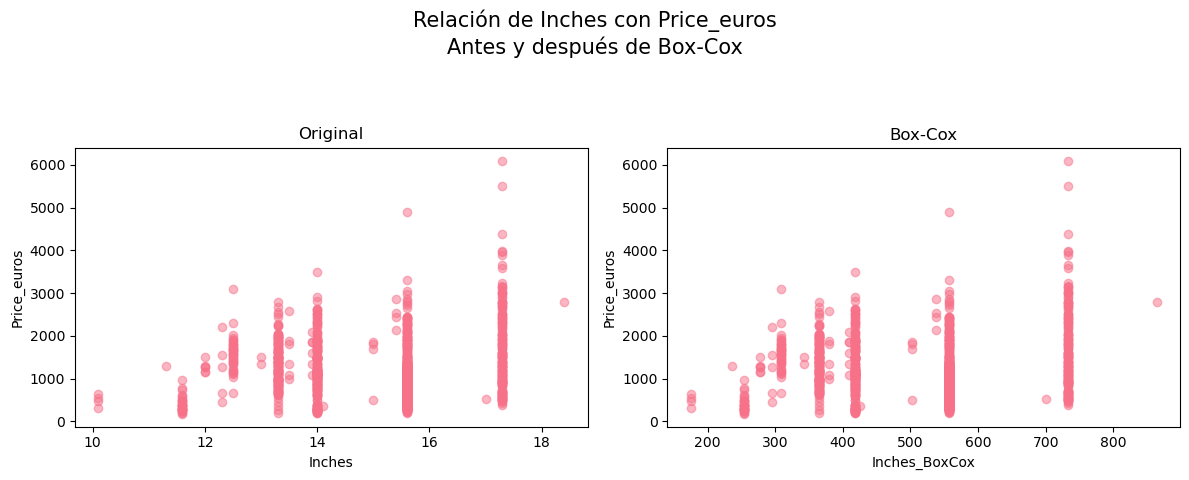

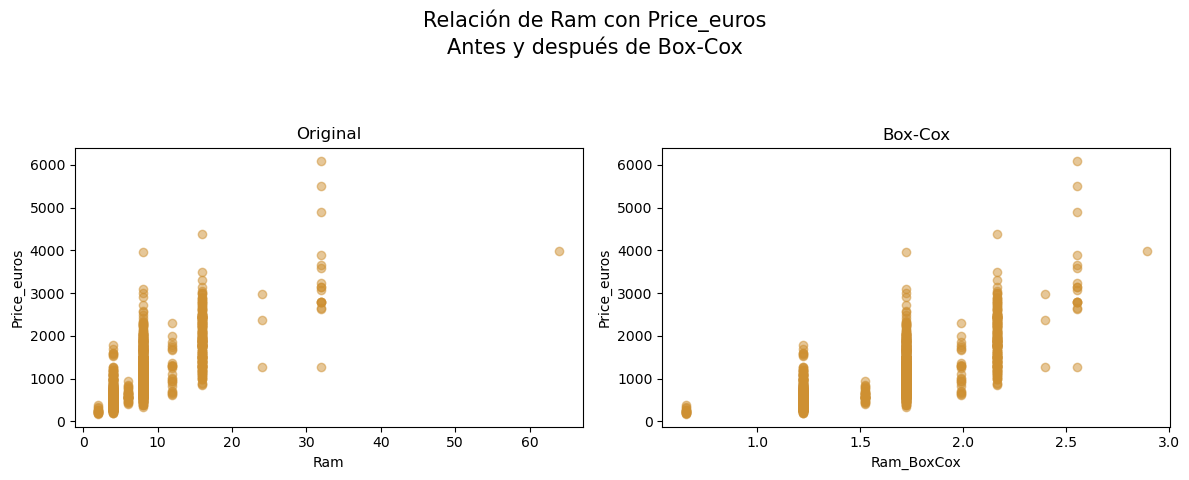

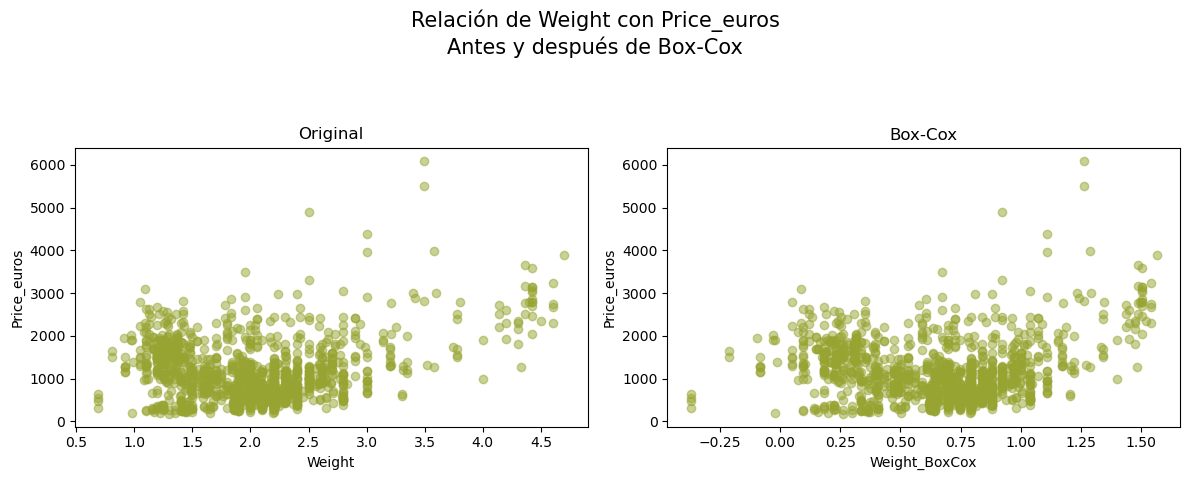

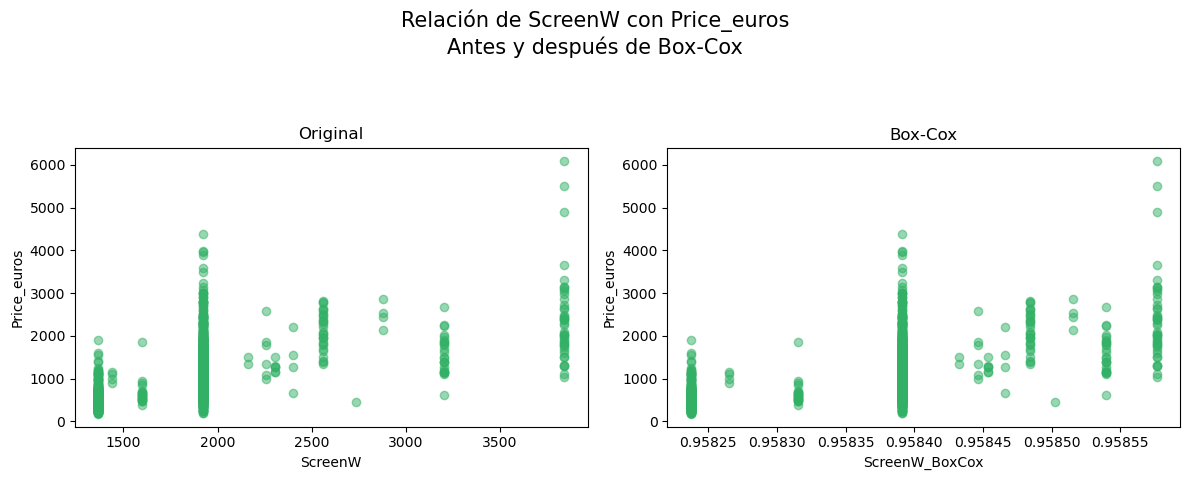

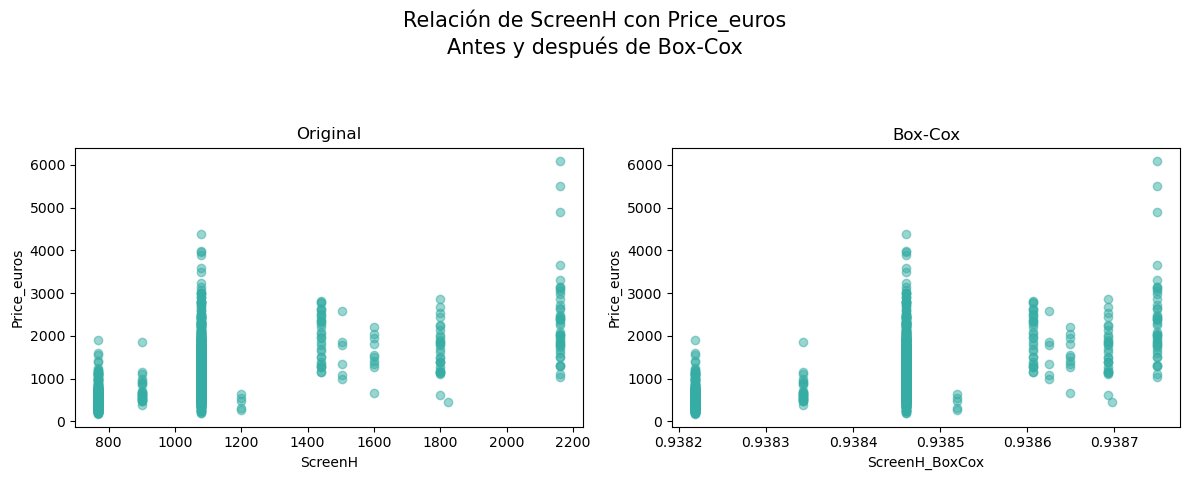

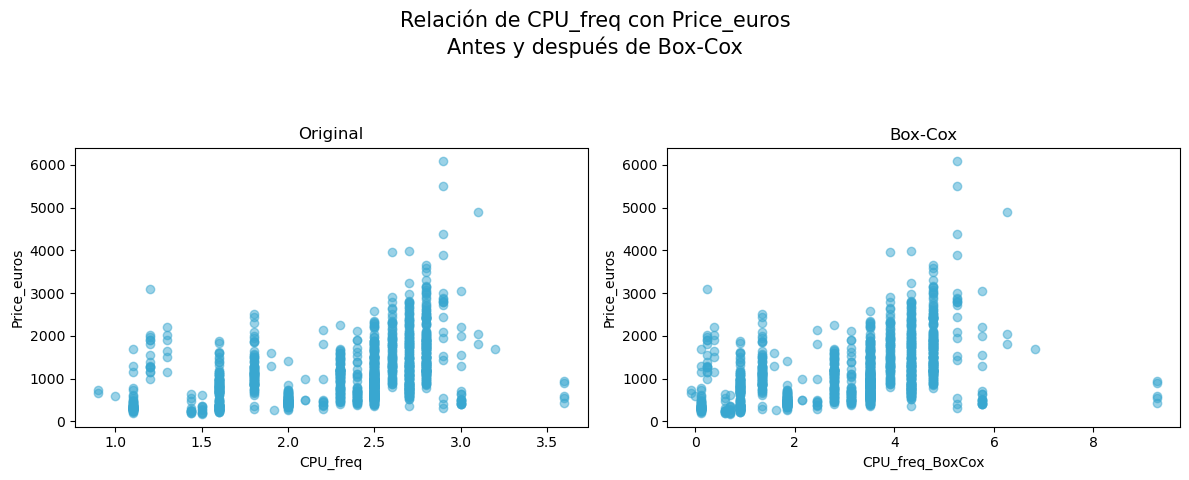

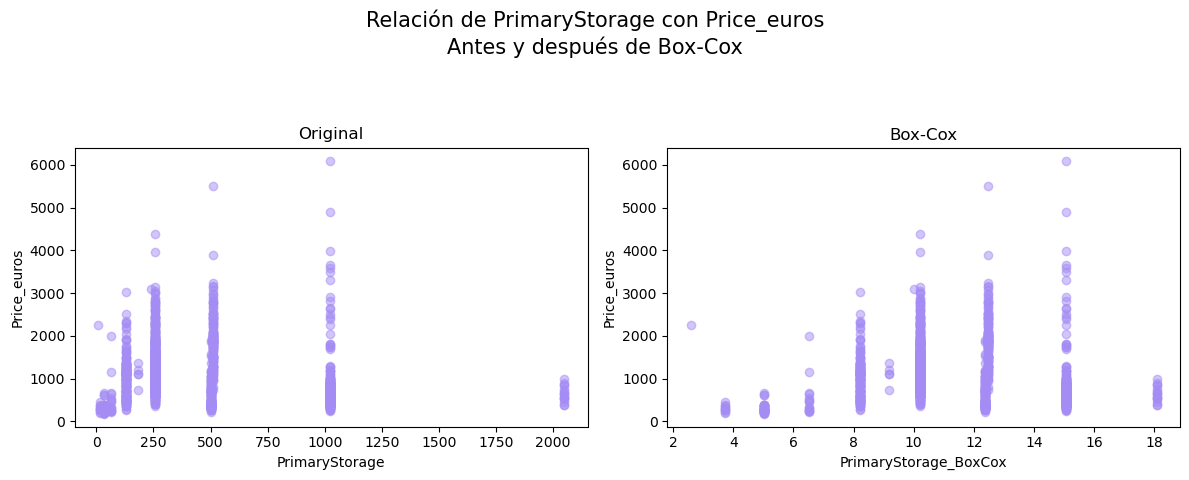

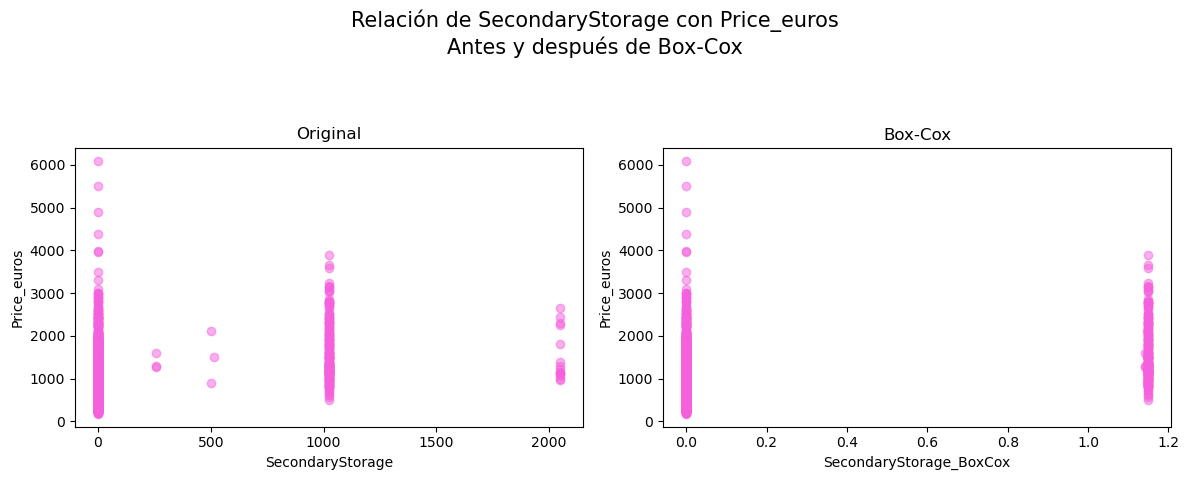

In [6]:
# Gráficos de dispersión de cada variable numérica respecto a Price_euros
# Antes y después de Box-Cox, de a pares (lado a lado), usando un color distinto para cada variable

for idx, feature in enumerate(numeric_features_original):
    feature_boxcox = f"{feature}_BoxCox"
    color = colors[idx]
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Relación de {feature} con Price_euros\nAntes y después de Box-Cox', fontsize=15)

    # Antes de Box-Cox
    axes[0].scatter(df_laptops[feature], df_laptops['Price_euros'], alpha=0.5, color=color)
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Price_euros')
    axes[0].set_title('Original')

    # Después de Box-Cox
    axes[1].scatter(df_laptops[feature_boxcox], df_laptops['Price_euros'], alpha=0.5, color=color)
    axes[1].set_xlabel(feature_boxcox)
    axes[1].set_ylabel('Price_euros')
    axes[1].set_title('Box-Cox')

    plt.tight_layout(rect=[0, 0.03, 1, 0.90])
    plt.show()


Con los resultados anteriores queda clara la influencia de la transfomacion box-cox sobre los datos y como esta modifica las distintas variables buscando mejorar la linealidad entre las mismas

En el siguiente notebook corregiremos un problema de multicolinealidad que se presento en la matriz de correlacion con ScreenH y ScreenW y crearemos el csv con las variables numericas ya preparadas